In [ ]:
import pandas as pd  #1.과제에서 오류 나는 부분이기 떄문에 다시한번 해볼 것. 오류원인??
import numpy as np

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'vehicle_prod.csv'
df= pd.read_csv(file, index_col=0)

sums = df.select_dtypes(np.number).sum().rename('Total')
total_df= df.append(sums)  #2.오류나는 이유? 구글코랩에서 append는 더이상 사용불가능함. 대신에 concat이라는 함수나, 다른 방법을 사용해야함.
total_df


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
import pandas as pd
import numpy as np

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
file = path + 'vehicle_prod.csv'
df= pd.read_csv(file, index_col=0)  #나라명으로 index하게 했으나,, 0-6까지밖에 숫자가 안떠서,, index를 국가명으로 바꿨습니다..

sums = df.select_dtypes(np.number).sum().rename('Total')
# Use pd.concat instead of df.append
total_df= pd.concat([df, pd.DataFrame(sums).T], ignore_index=True) # Convert sums to DataFrame and transpose for concatenation
total_df.index = total_df.index.to_series().replace({0:'China',1:'EU',2:'US',3:'Japan',4:'Korea',5:'Mexico',6:'Total'})

total_df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54
Total,54.12,50.77,45.04,55.68,57.25


In [ ]:
total_df['Average'] = total_df[['2007', '2008', '2009', '2010', '2011']].mean(axis=1) #과제1:'Average'열을만드는코드를보완
print(total_df)

         2007   2008   2009   2010   2011  Average
China    7.71   7.95  11.96  15.84  16.33   11.958
EU      19.02  17.71  15.00  16.70  17.48   17.182
US      10.47   8.45   5.58   7.60   8.40    8.100
Japan   10.87  10.83   7.55   9.09   7.88    9.244
Korea    4.04   3.78   3.45   4.20   4.62    4.018
Mexico   2.01   2.05   1.50   2.25   2.54    2.070
Total   54.12  50.77  45.04  55.68  57.25   52.572


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path+'weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range (12)]
monthly_wind = [0 for x in range (12)]
for i in range(12):
  monthly[i] = weather[weather['month']==i+1]
  monthly_wind[i] = monthly[i].mean()['평균기온'] #평균기온만 앞에 오면 평균기온만 필터링 할수있다

months = np.arange(1,13)
plt.bar(months, monthly_wind, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')

print(monthly_wind)

TypeError: Could not convert ['2011-01-012011-01-022011-01-032011-01-042011-01-052011-01-062011-01-072011-01-082011-01-092011-01-102011-01-112011-01-122011-01-132011-01-142011-01-152011-01-162011-01-172011-01-182011-01-192011-01-202011-01-212011-01-222011-01-232011-01-242011-01-252011-01-262011-01-272011-01-282011-01-292011-01-302011-01-312012-01-012012-01-022012-01-032012-01-042012-01-052012-01-062012-01-072012-01-082012-01-092012-01-102012-01-112012-01-122012-01-132012-01-142012-01-152012-01-162012-01-172012-01-182012-01-192012-01-202012-01-212012-01-222012-01-232012-01-242012-01-252012-01-262012-01-272012-01-282012-01-292012-01-302012-01-312013-01-012013-01-022013-01-032013-01-042013-01-052013-01-062013-01-072013-01-082013-01-092013-01-102013-01-112013-01-122013-01-132013-01-142013-01-152013-01-162013-01-172013-01-182013-01-192013-01-202013-01-212013-01-222013-01-232013-01-242013-01-252013-01-262013-01-272013-01-282013-01-292013-01-302013-01-312014-01-012014-01-022014-01-032014-01-042014-01-052014-01-062014-01-072014-01-082014-01-092014-01-102014-01-112014-01-122014-01-132014-01-142014-01-152014-01-162014-01-172014-01-182014-01-192014-01-202014-01-212014-01-222014-01-232014-01-242014-01-252014-01-262014-01-272014-01-282014-01-292014-01-302014-01-312015-01-012015-01-022015-01-032015-01-042015-01-052015-01-062015-01-072015-01-082015-01-092015-01-102015-01-112015-01-122015-01-132015-01-142015-01-152015-01-162015-01-172015-01-182015-01-192015-01-202015-01-212015-01-222015-01-232015-01-242015-01-252015-01-262015-01-272015-01-282015-01-292015-01-302015-01-312016-01-012016-01-022016-01-032016-01-042016-01-052016-01-062016-01-072016-01-082016-01-092016-01-102016-01-112016-01-122016-01-132016-01-142016-01-152016-01-162016-01-172016-01-182016-01-192016-01-202016-01-212016-01-222016-01-232016-01-242016-01-252016-01-262016-01-272016-01-282016-01-292016-01-302016-01-312017-01-012017-01-022017-01-032017-01-042017-01-052017-01-062017-01-072017-01-082017-01-092017-01-102017-01-112017-01-122017-01-132017-01-142017-01-152017-01-162017-01-172017-01-182017-01-192017-01-202017-01-212017-01-222017-01-232017-01-242017-01-252017-01-262017-01-272017-01-282017-01-292017-01-302017-01-312018-01-012018-01-022018-01-032018-01-042018-01-052018-01-062018-01-072018-01-082018-01-092018-01-102018-01-112018-01-122018-01-132018-01-142018-01-152018-01-162018-01-172018-01-182018-01-192018-01-202018-01-212018-01-222018-01-232018-01-242018-01-252018-01-262018-01-272018-01-282018-01-292018-01-302018-01-312019-01-012019-01-022019-01-032019-01-042019-01-052019-01-062019-01-072019-01-082019-01-092019-01-102019-01-112019-01-122019-01-132019-01-142019-01-152019-01-162019-01-172019-01-182019-01-192019-01-202019-01-212019-01-222019-01-232019-01-242019-01-252019-01-262019-01-272019-01-282019-01-292019-01-302019-01-312020-01-012020-01-022020-01-032020-01-042020-01-052020-01-062020-01-072020-01-082020-01-092020-01-102020-01-112020-01-122020-01-132020-01-142020-01-152020-01-162020-01-172020-01-182020-01-192020-01-202020-01-212020-01-222020-01-232020-01-242020-01-252020-01-262020-01-272020-01-282020-01-292020-01-302020-01-31'] to numeric

[1.5983870967741935, 2.136395759717314, 6.250322580645161, 11.06466666666667, 16.564193548387095, 19.61666666666667, 23.328387096774193, 24.748709677419356, 20.323666666666664, 15.383870967741936, 9.889666666666667, 3.753548387096774]


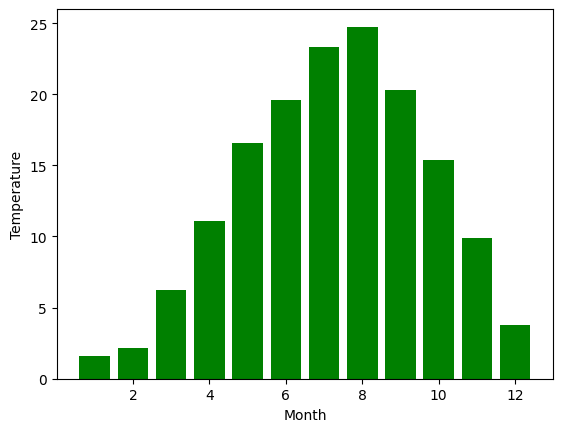

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path+'weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range (12)]
monthly_wind = [0 for x in range (12)]
for i in range(12):
  monthly[i] = weather[weather['month']==i+1]
  # Calculate the mean only for the '평균기온' column
  monthly_wind[i] = monthly[i]['평균기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_wind, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')

print(monthly_wind)

[3.7574193548387096, 3.946785714285714, 4.390291262135922, 4.62248322147651, 4.219354838709678, 3.461, 3.8774193548387097, 3.5961290322580637, 3.6616666666666666, 3.9616129032258067, 3.930666666666666, 3.817096774193548]


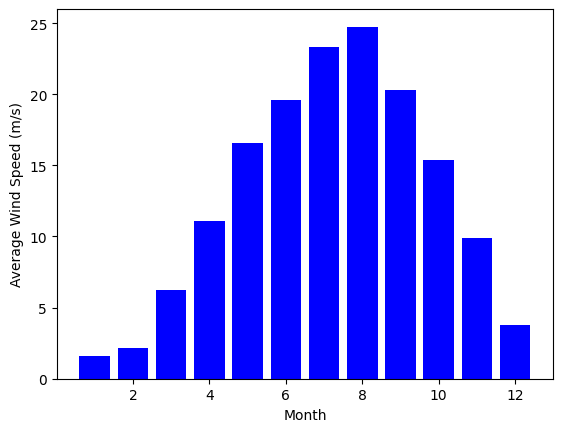

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'https://github.com/dongupak/DataML/raw/main/csv/'
weather_file = path+'weather.csv'
weather = pd.read_csv(weather_file, encoding='CP949')
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly = [None for x in range (12)]
monthly_wind_speed = [0 for x in range (12)]
for i in range(12):
  monthly[i] = weather[weather['month']==i+1]
  monthly_wind_speed[i] = monthly[i]['평균풍속'].mean()  #과제2. 평균풍속 그래프 만들기

months = np.arange(1,13)
plt.bar(months, monthly_wind, color='blue')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (m/s)')

print(monthly_wind_speed)


(세 번째 과제) 6주차 수업시간에 진행한 '논문작성 help'를 참고하여 자신의 prompt 를 만들어서 LLM(gemini 또는 chatGPT)에게서 얻은 결과를 정리하여 github 에 올리세요. -> 첨부파일로 첨부